# Linear Regression

The goal of this project is to build a linear regression model to predict work-life balance based on various factors. I will also compare the performance of linear regression with decision trees and random forest models to identify the best-performing model.

1. I’ll use Python with libraries like pandas, numpy, seaborn, and matplotlib to load the data and generate visualizations.
2. I'll implement three models: Linear Regression, Random Forest, and Decision Tree.
3. I’ll also include a function to predict from one data point and save the model with the lowest loss


# Import Libraries and Load the Dataset

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('education_career_success.csv')

# Use random sampling (10% of the data)
data = data.sample(frac=0.1, random_state=42)

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())


Dataset Preview:
      Age  High_School_GPA  SAT_Score  University_Ranking  University_GPA  \
1501   20             2.40       1479                 724            3.53   
2586   28             2.11       1284                 988            2.89   
2653   28             2.16        915                 673            3.94   
1055   22             3.58       1548                 775            3.58   
705    23             2.68       1590                 936            3.07   

      Internships_Completed  Projects_Completed  Certifications  \
1501                      4                   3               2   
2586                      3                   1               0   
2653                      4                   0               2   
1055                      4                   5               4   
705                       3                   4               3   

      Soft_Skills_Score  Networking_Score  ...  Field_of_Study_Business  \
1501                  3                 9 

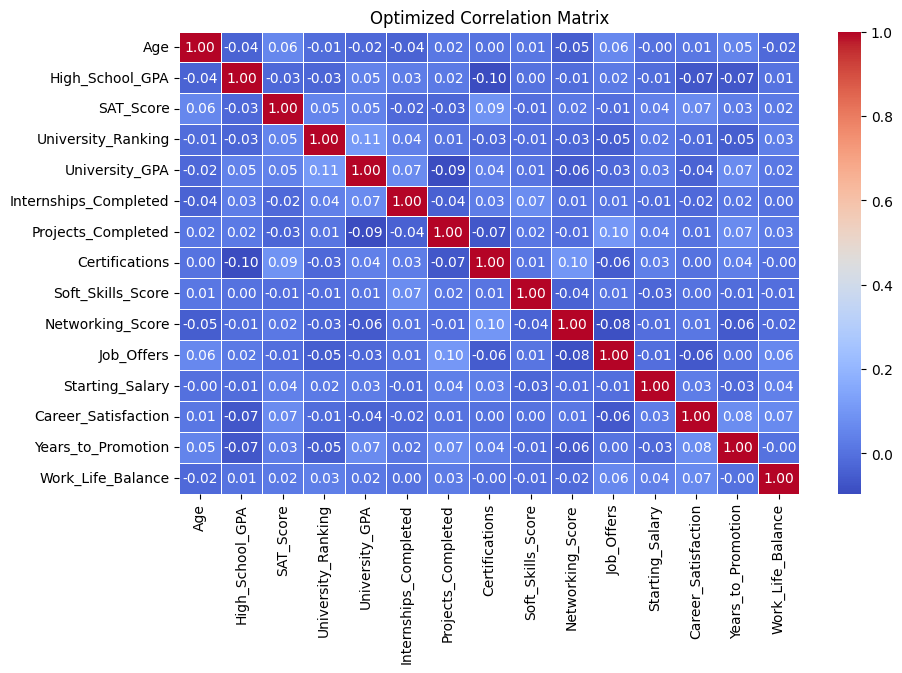

Available columns in dataset: ['Age', 'High_School_GPA', 'SAT_Score', 'University_Ranking', 'University_GPA', 'Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers', 'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion', 'Work_Life_Balance', 'Student_ID_S00013', 'Student_ID_S00024', 'Student_ID_S00027', 'Student_ID_S00030', 'Student_ID_S00034', 'Student_ID_S00044', 'Student_ID_S00066', 'Student_ID_S00070', 'Student_ID_S00080', 'Student_ID_S00081', 'Student_ID_S00085', 'Student_ID_S00091', 'Student_ID_S00094', 'Student_ID_S00101', 'Student_ID_S00107', 'Student_ID_S00110', 'Student_ID_S00133', 'Student_ID_S00145', 'Student_ID_S00150', 'Student_ID_S00152', 'Student_ID_S00158', 'Student_ID_S00169', 'Student_ID_S00178', 'Student_ID_S00180', 'Student_ID_S00200', 'Student_ID_S00211', 'Student_ID_S00220', 'Student_ID_S00222', 'Student_ID_S00228', 'Student_ID_S00229', 'Student_ID_S00231', 'Student_ID_S00241', 'Student_ID_S

In [47]:
# Compute correlation only for numerical columns
numerical_cols = data.select_dtypes(include=['number'])
correlation_matrix = numerical_cols.corr()

# Reduce annotation density by rounding values and limiting the number of annotations
plt.figure(figsize=(10, 6))  # Adjust size for readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Optimized Correlation Matrix')
plt.show()
print("Available columns in dataset:", data.columns.tolist())

# Data Preprocessing

## Splitting the Data

In [1]:
# Selecting features and target variable
X = data.drop(['Work-Life Balance'], axis=1)
y = data['Work-Life Balance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'data' is not defined

# Training the Models

## 1. Linear Regression 

In [50]:
# Compute correlation of all features with the target variable
target_column = 'Work_Life_Balance'
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix[target_column].abs().sort_values(ascending=False)

# Select the top 10 most correlated features (excluding the target itself)
top_10_features = correlation_with_target.iloc[1:11].index.tolist()

# Print selected features
print("Top 10 Selected Features:")
print(top_10_features)

# Use only the top 10 features for training
X = data[top_10_features]
y = data[target_column]

# Split the dataset using only the selected 10 features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Top 10 Selected Features:
['Field_of_Study_Business', 'Gender_Other', 'Student_ID_S03007', 'Student_ID_S03383', 'Student_ID_S02654', 'Student_ID_S04254', 'Student_ID_S01198', 'Student_ID_S02560', 'Student_ID_S04680', 'Student_ID_S02624']
X_train shape: (400, 10)
X_test shape: (100, 10)
y_train shape: (400,)
y_test shape: (100,)


In [51]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = lin_reg.predict(X_test)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R^2: {r2_lr}")


Linear Regression MSE: 7.985704995241072
Linear Regression R^2: 0.00472294291327191


## 2. Decision Tree

In [53]:
# Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R^2: {r2_tree}")


Decision Tree MSE: 7.985704995241072
Decision Tree R^2: 0.00472294291327191


## 3. Random Forest

In [54]:
# Random Forest Regressor
forest_reg = RandomForestRegressor(random_state=42, n_estimators=100)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Metrics
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print(f"Random Forest MSE: {mse_forest}")
print(f"Random Forest R^2: {r2_forest}")


Random Forest MSE: 7.974811350291609
Random Forest R^2: 0.006080643315767409


# Model comparison and saving the best model

In [55]:
from sklearn.preprocessing import StandardScaler
import joblib
import os
import pandas as pd

# Create directory for saved models
os.makedirs('saved_models', exist_ok=True)

# Standardize only the selected 10 features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)

# Train models
lin_reg.fit(X_train_scaled, y_train)
tree_reg.fit(X_train_scaled, y_train)
forest_reg.fit(X_train_scaled, y_train)

# Evaluate models
mse_lr = mean_squared_error(y_test, lin_reg.predict(X_test_scaled))
mse_tree = mean_squared_error(y_test, tree_reg.predict(X_test_scaled))
mse_forest = mean_squared_error(y_test, forest_reg.predict(X_test_scaled))

r2_lr = r2_score(y_test, lin_reg.predict(X_test_scaled))
r2_tree = r2_score(y_test, tree_reg.predict(X_test_scaled))
r2_forest = r2_score(y_test, forest_reg.predict(X_test_scaled))

# Compare models
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_tree, mse_forest],
    'R^2': [r2_lr, r2_tree, r2_forest]
})

# Select best model (lowest MSE)
best_model_index = models['MSE'].idxmin()
best_model_name = models.loc[best_model_index, 'Model']

# Choose the best model
if best_model_name == 'Linear Regression':
    best_model = lin_reg
elif best_model_name == 'Decision Tree':
    best_model = tree_reg
else:
    best_model = forest_reg

# Save scaler
scaler_path = "saved_models/scaler.pkl"
try:
    joblib.dump(scaler, scaler_path)
    print(f"✓ Scaler saved at {scaler_path}")
except Exception as e:
    print(f"⚠ Error saving scaler: {e}")

# Save best model
model_path = "saved_models/best_model.pkl"
try:
    joblib.dump(best_model, model_path)
    print(f"✓ Best model ({best_model_name}) saved at {model_path}")
except Exception as e:
    print(f"⚠ Error saving best model: {e}")

# Display results
print("\n📊 Model Comparison:")
print(models)

print("\n🏆 Best Model Details:")
print(f"Model Name: {best_model_name}")
print(f"MSE: {models.loc[best_model_index, 'MSE']:.4f}")
print(f"R^2: {models.loc[best_model_index, 'R^2']:.4f}")

✓ Scaler saved at saved_models/scaler.pkl
✓ Best model (Random Forest) saved at saved_models/best_model.pkl

📊 Model Comparison:
               Model       MSE       R^2
0  Linear Regression  7.985705  0.004723
1      Decision Tree  7.985705  0.004723
2      Random Forest  7.974811  0.006081

🏆 Best Model Details:
Model Name: Random Forest
MSE: 7.9748
R^2: 0.0061


# Visualize the Loss Curve

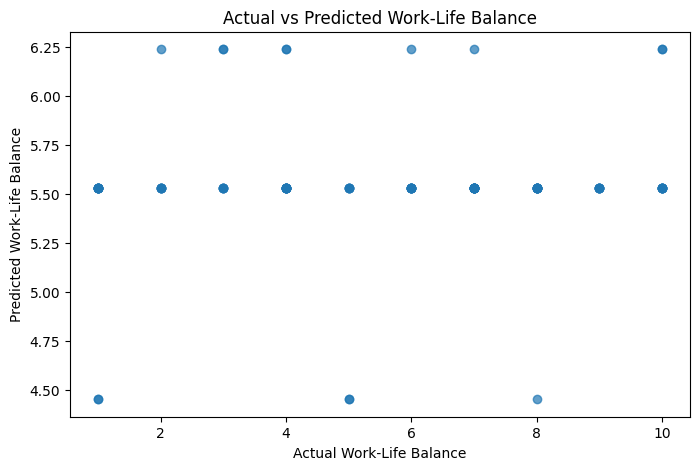

In [56]:
# Plotting the actual vs predicted values for the best model
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_forest, alpha=0.7)
plt.xlabel("Actual Work-Life Balance")
plt.ylabel("Predicted Work-Life Balance")
plt.title("Actual vs Predicted Work-Life Balance")
plt.show()

# Prediction Script


In [57]:
import joblib
import numpy as np

# Load the saved model
model = joblib.load('saved_models/best_model.pkl')

def predict_work_life_balance(input_data):
    prediction = model.predict(np.array(input_data).reshape(1, -1))
    return prediction[0]